---
title: "Monte Carlo Integration"
author:
  - name: "Mustafa Aslan"
    title: "PhD Student"
    affiliation: "Cardiff University, UK"
    email: "aslanm@cardiff.ac.uk"
description: "A comprehensive guide to Monte Carlo integration techniques, including examples and Python implementations."
date: 2025-08-09
categories: [learning]
format: html
---

Monte Carlo integration is a statistical technique that allows us to approximate complex integrals using random sampling. The basic idea is to use random points in the domain of the integrand to estimate the average value of the function, which can then be scaled by the volume of the domain to obtain an estimate of the integral.

The steps for performing Monte Carlo integration are as follows:

1. Define the integral you want to compute, including the domain of integration and the integrand function.
2. Generate a set of random points within the domain.
3. Evaluate the integrand at each of these points.
4. Compute the average value of the integrand evaluations.
5. Scale the average by the volume of the domain to obtain the final estimate of the integral.

Monte Carlo integration is particularly useful for high-dimensional integrals or when the integrand is difficult to evaluate analytically. It can also be applied to problems in physics, finance, and other fields where uncertainty and randomness play a significant role.


## Basic Monte Carlo Integration

Suppose we want to evaluate the integral

$$
I = \int_0^1 h(x) \, dx
$$

for some function $h(x)$.

If $h$ is complicated there may be no known closed form expression for $I$. In such cases, we can use Monte Carlo integration to obtain an approximate value for the integral.

Let us begin by writing

$$
I = \int_a^b h(x) \, dx = \int_a^b w(x)f(x) \, dx
$$

where $w(x) = h(x)(b-a)$ and $f(x) = 1/(b-a)$. Notice that $f$ is the probability density for a uniform random variable over $(a, b)$. Hence

$$
I = \int_a^b w(x)f(x) \, dx = \mathbb{E}_f[w(X)]
$$

where $X$ is a random variable uniformly distributed over $(a, b)$.

If we generate $N$ independent samples $X_1, X_2, \ldots, X_N$ from the distribution of $X$, we can approximate the integral using the sample average, which satisfies law of large numbers:

$$
\hat{I} \approx \frac{1}{N} \sum_{i=1}^N w(X_i)
$$

This gives us a ***Monte Carlo estimate of the integral***.

We can also compute the standard error of the estimate:

$$
\text{SE} = \frac{1}{\sqrt{N}} \sigma_w
$$

where 

$$
\sigma_w = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (w(X_i) - \hat{I})^2}
$$


### Example 1

Let $h(x) = x^3$. We want to estimate the integral

$$
I = \int_0^1 x^3 \, dx
$$

Using the Monte Carlo method, we can approximate this integral by generating random samples from the uniform distribution over $(0, 1)$ which is $(a, b)$ in the formula.

The goal is the compute
$$
\hat{I} = \int_0^1 x^3 \, dx
$$

**Analytical answer**: $I = 1/4$ (easy to compute)

**Monte Carlo estimate**:

- Simulation steps
1. Generate $10,000$ random samples $X_1, X_2, \ldots, X_{10,000}$ from the uniform distribution over $(0, 1)$.
2. Compute for each sample $X_i$ the value $h(X_i) = X_i^3$.
3. Estimate the integral as the average of these values:
$$
\hat{I} \approx \frac{1}{10,000} \sum_{i=1}^{10,000} (X_i^3)
$$

We get $\hat{I} \approx 0.243$.

Monte Carlo method generates an answer that is close to the analytical solution, which is $0.25$, but not exact. The accuracy of the Monte Carlo estimate improves with more samples.


#### Python implementation

In [1]:
# python implementation
import numpy as np
np.random.seed(42) # for reproducibility

# calculate for N = 100 and increase by 50 untill 10000 to see the convergence to the true value which is 0.25
history_ex1 = []
for N in range(100, 10001, 50):
    X = np.random.uniform(0, 1, N)
    H = X**3
    I_hat = np.mean(H)
    history_ex1.append([N, I_hat])
history_ex1 = np.array(history_ex1)

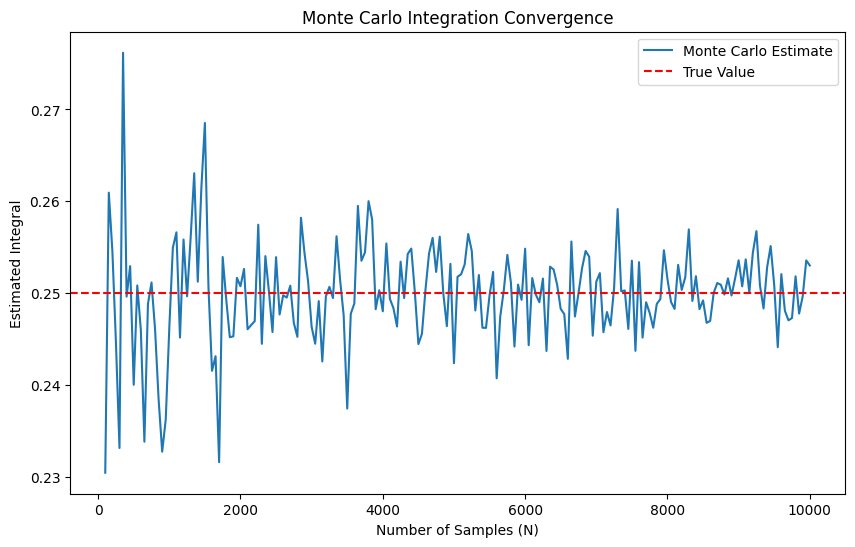

In [2]:
#plot history against number of samples to observe convergence
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_ex1[:, 0], history_ex1[:, 1], label='Monte Carlo Estimate')
plt.axhline(y=0.25, color='r', linestyle='--', label='True Value')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Estimated Integral')
plt.title('Monte Carlo Integration Convergence')
plt.legend()
plt.show()

### Example 2

Let

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

be the standard Normal pdf. Suppose we want to compute the cdf at some point $x$:

$$
I = \int_{-\infty}^x f(s) ds = \Phi(x).
$$

Write

$$
I = \int h(s) f(s) ds
$$

where

$$
h(s) = \begin{cases}
1 & s < x \\
0 & s \geq x
\end{cases}
$$

Now we generate $X_1, \ldots, X_N \sim N(0,1)$ and set

$$
\hat{I} = \frac{1}{N} \sum_i h(X_i) = \frac{\text{number of observations } \leq x}{N}.
$$

For example, with $x = 2$, the true answer is $\Phi(2) = .9772$ and the Monte Carlo estimate with $N = 10,\!000$ yields $.9751$. Using $N = 100,\!000$ we get $.9771$.




In [3]:
# Python implementation

import numpy as np
from scipy.stats import norm

x = 2

# True value
I_true = norm.cdf(x)
# calculate for N = 100 and increase by 50 untill 10000 to see the convergence to the true value which is 0.9772
history_ex2 = []
for N in range(100, 10001, 50):
    X = np.random.normal(0, 1, N)
    h = (X < x).astype(int)
    I_hat = np.mean(h)
    history_ex2.append([N, I_hat])
history_ex2 = np.array(history_ex2)

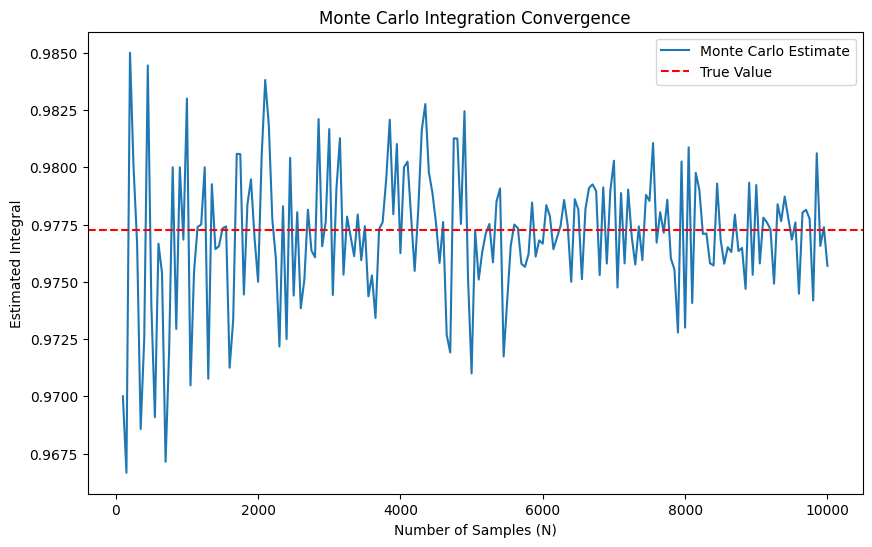

In [4]:
#plot history against number of samples to observe convergence
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_ex2[:, 0], history_ex2[:, 1], label='Monte Carlo Estimate')
plt.axhline(y=I_true, color='r', linestyle='--', label='True Value')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Estimated Integral')
plt.title('Monte Carlo Integration Convergence')
plt.legend()
plt.show()